In [ ]:
pip install wordcloud 

In [2]:
pip install jupyter-resource-usage

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\AMI\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random
from PIL import Image
from datetime import datetime
import unicodedata
import nltk
from wordcloud import WordCloud

In [3]:
customer=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\olist_customers_dataset.csv")
customer.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
loc=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\olist_geolocation_dataset.csv")
loc.head(5)
loc.rename(columns={"geolocation_zip_code_prefix":"zip_code_prefix"},inplace=True)
loc

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [5]:
order_items=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\olist_order_items_dataset.csv")
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_pay=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\olist_order_payments_dataset.csv")
order_pay.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_review=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\olist_order_reviews_dataset.csv")
order_review.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\olist_orders_dataset.csv")
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\olist_products_dataset.csv")
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\olist_sellers_dataset.csv")

sellers.rename(columns={"seller_zip_code_prefix":"zip_code_prefix"},inplace=True)
sellers.head(5)

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
product_name=pd.read_csv(r"C:\Users\AMI\Desktop\ineu\Ecom\product_category_name_translation.csv")
product_name.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


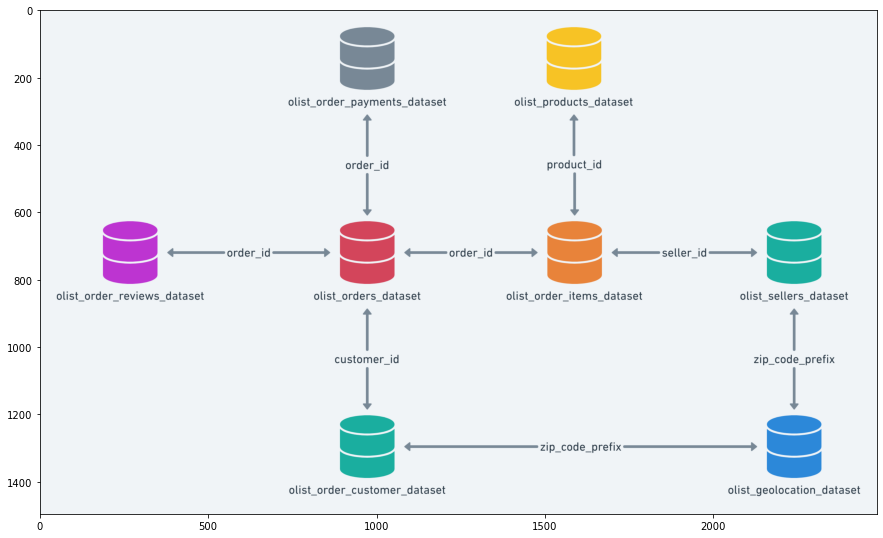

In [3]:
img = mpimg.imread(r"C:\Users\AMI\Desktop\ineu\Ecom\schema.png")
  
# Output Images
plt.figure(figsize=(15,15))
plt.imshow(img)

In [14]:
data_frames=[customer,loc,order_items,order_pay,order_review,orders,products,sellers,product_name]
titles=["customers","geolocation","ordr_items","order_pay","order_review","orders","poducts","seller","product_name"]

df_info=pd.DataFrame({},)
df_info['no_of_columns']=[len(df.columns) for df in data_frames]
df_info['no_of_rows']=[df.shape[0] for df in data_frames]
df_info['column_name']=[', '.join(list(df.columns)) for df in data_frames]

df_info.style.background_gradient(cmap="Greys")

,no_of_columns,no_of_rows,column_name
0,5,99441,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state"
1,5,1000163,"zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state"
2,7,112650,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value"
3,5,103886,"order_id, payment_sequential, payment_type, payment_installments, payment_value"
4,7,100000,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp"
5,8,99441,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date"
6,9,32951,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,4,3095,"seller_id, zip_code_prefix, seller_city, seller_state"
8,2,71,"product_category_name, product_category_name_english"


### Merging Dataframes

In [15]:

data_frames=[customer,loc,order_items,order_pay,order_review,orders,products,sellers,product_name]
titles=["customers","geolocation","ordr_items","order_pay","order_review","orders","poducts","seller","product_name"]

df_info1=pd.DataFrame({},)
df_info1['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in data_frames]

#creating total number of columns in the dataset 
df_info1['cols_no']= [df.shape[1] for df in data_frames]

#counting total null values
df_info1['null_no']= [df.isnull().sum().sum() for df in data_frames]

#creating total number of columns in the dataset with null-values 
df_info1['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in data_frames]

#creating column of name of columns in the dataset with null-values 
df_info1['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in data_frames]


df_info1.style.background_gradient(cmap='Greys')

,cols,cols_no,null_no,null_cols_no,null_cols
0,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,"zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",5,0,0,
2,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
3,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
4,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",7,146532,2,"review_comment_title, review_comment_message"
5,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,"seller_id, zip_code_prefix, seller_city, seller_state",4,0,0,
8,"product_category_name, product_category_name_english",2,0,0,


In [17]:
df = pd.merge(orders,order_pay, on="order_id")
df = df.merge(customer, on="customer_id")
df = df.merge(order_items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(product_name, on="product_category_name")
df = df.merge(order_review, on="order_id")
df = df.merge(sellers,on="seller_id")
df= df.merge(loc,on="zip_code_prefix")
df.head()
df.shape


(16849468, 44)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16849468 entries, 0 to 16849467
Data columns (total 44 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   payment_sequential             int64  
 9   payment_type                   object 
 10  payment_installments           int64  
 11  payment_value                  float64
 12  customer_unique_id             object 
 13  customer_zip_code_prefix       int64  
 14  customer_city                  object 
 15  customer_state                 object 
 16  order_item_id                  int64  
 17  product_id                     object 
 18  

In [19]:
df.isnull().sum()

order_id                                0
customer_id                             0
order_status                            0
order_purchase_timestamp                0
order_approved_at                    1761
order_delivered_carrier_date       174711
order_delivered_customer_date      358891
order_estimated_delivery_date           0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
product_category_name                   0
product_name_lenght               

===========================================================================================================================================================
__Handling with missing value.__

- The order of different types of timestamps are shown below:
order_purchase_timestamp-->order_approved_at--> order_delivered_carrier_date-->order_delivered_customer_date-->order_estimated_delivery_dat
e     

- Timestamps containg missing values are order_approved_at, order_delivered_carrier_date, order_delivered_customer_date.

- null-values in order_approved_at can be replaced by order_purchase_timestamp and null-values in order_delivered_customer_date can be replaced by order_estimated_delivery_date

- we can drop the column order_delivered_carrier_date.

In [20]:
index=df[df.order_approved_at.isnull()==True].index.values
index

array([ 3638780,  3638781,  3638782, ..., 16580202, 16580203, 16580204],
      dtype=int64)

In [19]:
df["order_approved_at"].fillna(df["order_purchase_timestamp"], inplace=True)
df["order_delivered_customer_date"].fillna(df["order_estimated_delivery_date"], inplace=True)

#dropping order delivery carrier date
df.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

MemoryError: Unable to allocate 1.51 GiB for an array with shape (12, 16849468) and data type float64

In [19]:
df.isnull().sum()

order_id                                0
customer_id                             0
order_status                            0
order_purchase_timestamp                0
order_approved_at                       0
order_delivered_customer_date           0
order_estimated_delivery_date           0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
product_category_name                   0
product_name_lenght                     0
product_description_lenght        

____________________________________________________________________________________________________________________________
- Handling missing values of numerical features

In [ ]:
columns = ["product_weight_g","product_length_cm","product_height_cm","product_width_cm"]

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
columns = ["product_weight_g","product_length_cm","product_height_cm","product_width_cm"]

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
#Handling missing values of numerical features
df['product_weight_g'].fillna(df['product_weight_g'].median(),inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].median(),inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].median(),inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].median(),inplace=True)


______________________________________________________________________________________________________________________________________
- Handling missing values of text column

In [20]:
per_rev_title=(df.review_comment_title.isnull().sum())/len(df)
print(f"percentage of null review :{per_rev_title*100}%")
per_rev_comment=(df.review_comment_message.isnull().sum())/len(df)
print(f"percentage of null review :{per_rev_comment*100}%")





percentage of null review :88.45314878784303%
percentage of null review :57.100188563816964%


In [21]:

df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], format='%Y/%m/%d %H:%M:%S')
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'], format='%Y/%m/%d %H:%M:%S')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], format='%Y/%m/%d %H:%M:%S')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], format='%Y/%m/%d %H:%M:%S')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], format='%Y/%m/%d %H:%M:%S')



- In this kernel, we are going to analyze Olist's E-Commerce dataset aiming to extract value from customer reviews. 

- These satisfaction surveys are created and sent to the customer by e-mail when he/she receives the product, or when the estimated delivery date is due. Each experience is given a 1-5 rating, and the customer may write down some comments



In [22]:
reviews = pd.merge(order_review, orders, on='order_id')

In [23]:
columns= [
    'review_id', 
    'order_id', 
    'customer_id', 
    'review_comment_title', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_estimated_delivery_date'
]
reviews.drop(columns=columns, inplace=True)

In [32]:
reviews

,review_score,review_comment_message,review_creation_date,review_answer_timestamp,order_status,order_purchase_timestamp,order_delivered_customer_date
0,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,delivered,2018-01-11 15:30:49,2018-01-17 18:42:41
1,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,delivered,2018-02-28 12:25:19,2018-03-09 23:17:20
2,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,delivered,2018-02-03 09:56:22,2018-02-16 17:28:48
3,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,delivered,2017-04-09 17:41:13,2017-04-20 09:08:35
4,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,delivered,2018-02-10 10:59:03,2018-02-28 16:33:35
...,...,...,...,...,...,...,...
99995,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,delivered,2017-12-03 21:45:23,2017-12-08 17:19:00
99996,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,delivered,2018-03-18 09:52:19,2018-03-21 17:44:08
99997,4,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,delivered,2018-06-22 16:47:28,2018-06-30 12:57:51
99998,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,delivered,2017-12-10 18:44:23,2017-12-14 22:04:30


In [33]:
five_star_len=len(reviews[reviews['review_score'] == 5])*100/len(reviews)
one_star_len=len(reviews[reviews['review_score'] == 1])*100/len(reviews)
first_dt = reviews['review_creation_date'].min()
last_dt = reviews['review_creation_date'].max()
avg_s = reviews['review_score'].mean()
print(len(reviews), 'reviews')
print('First:', first_dt)
print('Last:', last_dt)
print(f'5★: {five_star_len:.1f}%')
print(f'1★: {one_star_len:.1f}%')
print(f'Average: {avg_s:.1f}★')

100000 reviews
First: 2016-10-02 00:00:00
Last: 2018-08-31 00:00:00
5★: 57.4%
1★: 11.9%
Average: 4.1★


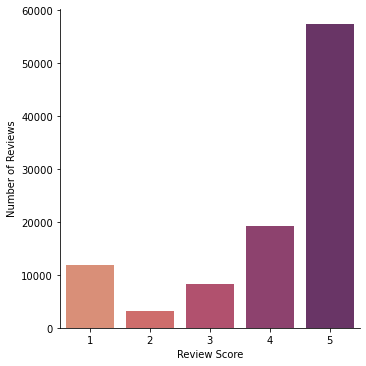

In [34]:
sns.catplot(
    x='review_score', 
    kind='count', 
    data=reviews, 
    palette="flare"
).set(
    xlabel='Review Score', 
    ylabel='Number of Reviews',
);


__Here we can see the review score distribution. It is interesting to observe that there's more 1 star reviews than 2/3 stars reviews.__

In [35]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], format='%Y/%m/%d %H:%M:%S')

reviews['order_purchase_timestamp'] = pd.to_datetime(reviews['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')

reviews['review_delay'] = (reviews['review_creation_date'] - reviews['order_purchase_timestamp']).dt.days


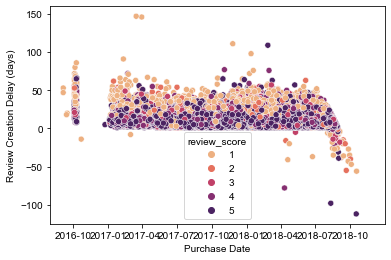

In [36]:
sns.scatterplot(
    x='order_purchase_timestamp', 
    y='review_delay', 
    hue='review_score', 
    palette= "flare", 
    data=reviews
).set(
    xlabel='Purchase Date', 
    ylabel='Review Creation Delay (days)',
    xlim=(datetime(2016, 8, 1), datetime(2018, 12, 31))
);
sns.set(rc={'figure.figsize':(15,15)})


__We expect that reviews are created after the corresponding purchases, but our dataset has some negative values for the review creation delay (reviews sent to customers before the purchase happening?). Fortunately, most of them were sent to customers a few days later, as expected.__

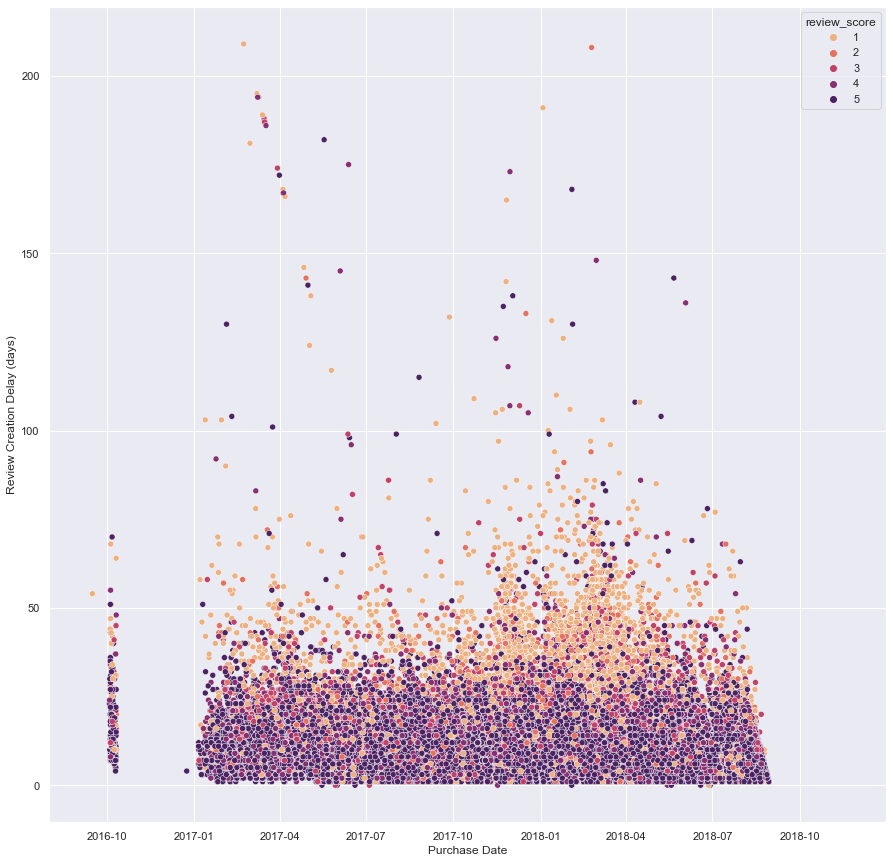

In [37]:
reviews['order_delivered_customer_date'] = pd.to_datetime(reviews['order_delivered_customer_date'], format='%Y/%m/%d %H:%M:%S')
reviews['order_delay'] = (reviews['order_delivered_customer_date'] - reviews['order_purchase_timestamp']).dt.days
sns.scatterplot(
    x='order_purchase_timestamp', 
    y='order_delay', 
    hue='review_score', 
    palette= "flare", 
    data=reviews
).set(
    xlabel='Purchase Date', 
    ylabel='Review Creation Delay (days)',
    xlim=(datetime(2016, 8, 1), datetime(2018, 12, 31))
);
sns.set(rc={'figure.figsize':(12,12)})


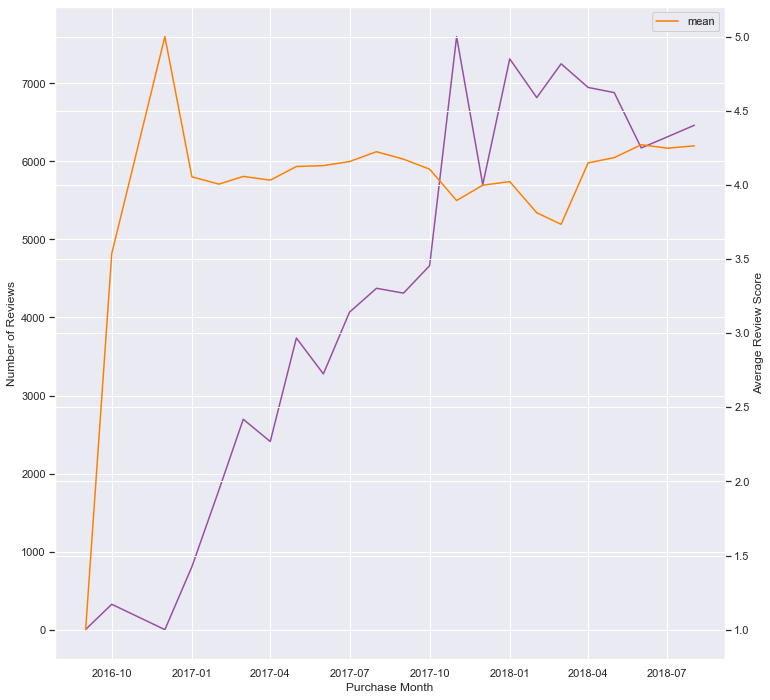

In [38]:
reviews["month_year"]=reviews["order_purchase_timestamp"].dt.to_period("M")
reviews_timeseries = reviews[reviews['review_delay'] > 0].groupby('month_year')['review_score'].agg(['count', 'mean'])
ax = sns.lineplot(
    x=reviews_timeseries.index.to_timestamp(), 
    y='count', 
    data=reviews_timeseries, 
    color='#984ea3', 
    label='count'
)
ax.set(xlabel='Purchase Month', ylabel='Number of Reviews')

sns.lineplot(
    x=reviews_timeseries.index.to_timestamp(),
    y='mean',
    data=reviews_timeseries, 
    ax=ax.twinx(), 
    color='#ff7f00', 
    label='mean'
).set(ylabel='Average Review Score');

sns.set(rc={'figure.figsize':(16,16)})

__order status__

In [39]:

reviews["order_status"].value_counts()

delivered      97015
shipped         1118
canceled         629
unavailable      611
invoiced         318
processing       302
created            5
approved           2
Name: order_status, dtype: int64

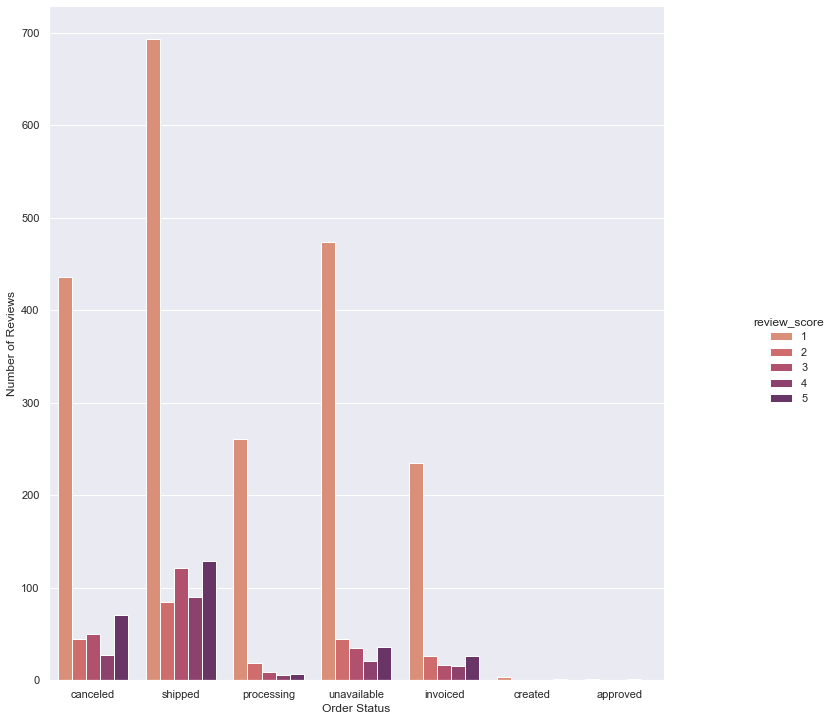

In [40]:

ax = sns.catplot(
    x='order_status',
    kind='count',
    hue='review_score',
    data=reviews[reviews['order_status'] != 'delivered'],
    palette="flare"
).set(xlabel='Order Status', ylabel='Number of Reviews');
ax.fig.set_figwidth(12.27)
ax.fig.set_figheight(10.7)


__If we see review score distribution of orders that do not have a 'delivered' status, we can see that most of them have a 1 star rating.__



In [41]:
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'], format='%Y/%m/%d %H:%M:%S')
reviews['delay'] = (reviews['review_answer_timestamp'] - reviews['review_creation_date']).dt.days
bins = [-1, 0, 1, 2, 3, 4, 5, 99999]
labels = ['0', '1', '2', '3', '4', '5', '6+']
reviews['delay_group'] = pd.cut(reviews['delay'], bins, labels=labels)
reviews['delay_group'] 

0        0
1        1
2        1
3        0
4        1
        ..
99995    2
99996    1
99997    1
99998    1
99999    0
Name: delay_group, Length: 100000, dtype: category
Categories (7, object): ['0' < '1' < '2' < '3' < '4' < '5' < '6+']

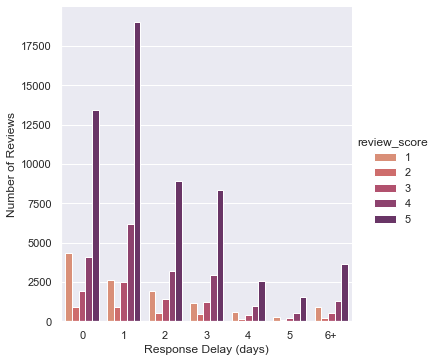

In [42]:
sns.catplot(
    x='delay_group', 
    kind='count', 
    hue='review_score', 
    data=reviews, 
    palette="flare"
).set(xlabel='Response Delay (days)', ylabel='Number of Reviews');



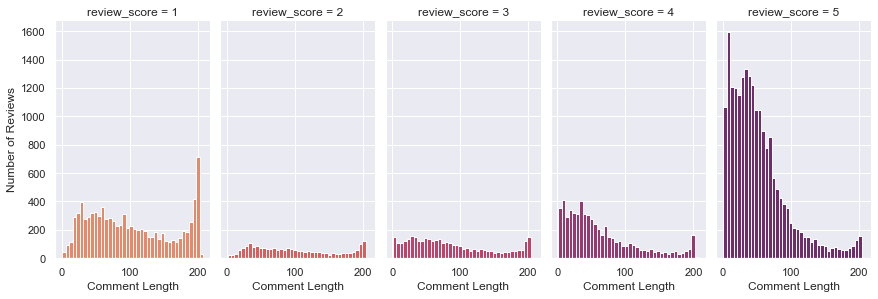

In [83]:
reviews['review_length'] = reviews['review_comment_message'].str.len()
g = sns.FacetGrid(data=reviews, col='review_score', hue='review_score', palette="flare")
g.map(plt.hist, 'review_length', bins=40)
g.set_xlabels('Comment Length')
g.set_ylabels('Number of Reviews')
plt.gcf().set_size_inches(12, 5)


__It looks like unhappy customers are more likely to write comments. Below we can see that they write longer comments__

 __what are those comments about? We can use a bit of Natural Language Processing to discover that. The process is summarized below:__

- Convert text to lowercase
- Compatibility decomposition (decomposes ã into a~)
- Encode to ascii ignoring errors (removes accents), reencoding again to utf8
- Tokenization, to break a sentence into words
- Removal of stop words and non-alpha strings (special characters and numbers)
- Lemmatization (transform into base or dictionary form of a word)*
- N-grams creation (group lemmas next to each other, by comment)
- Grouping n-grams of all comments together
- Lemmatization is not available for Portuguese words with the NLTK package. I tried stemming, but it only made the result look uglier, without further grouping the words. Another approach would be to translate the text to English first, but I'll leave this alternative for a later time.



In [77]:
def remove_accents(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', errors='ignore').decode('utf-8')

STOP_WORDS = set(remove_accents(w) for w in nltk.corpus.stopwords.words('portuguese'))
STOP_WORDS.remove('nao') # This word is key to understand delivery problems later


In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
def comments_to_words(comment):
    lower=comment.lower()
    normalized=remove_accents(lower)
    tokens=nltk.tokenize.word_tokenize(normalized)
    words=tuple(t for t in tokens if t not in  STOP_WORDS and t.isalpha())
    return words


def words_grams(words):
    unigrams, bigrams, trigrams = [], [], []
    for comment_words in words:
        unigrams.extend(comment_words)
        bigrams.extend(' '.join(bigram) for bigram in nltk.bigrams(comment_words))
        trigrams.extend(' '.join(trigram) for trigram in nltk.trigrams(comment_words))
        return unigrams, bigrams, trigrams
        
def plot_freq(tokens, color):

    nltk.FreqDist(tokens).plot(25, cumulative=False, color=color)

In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
commented_reviews = reviews[reviews['review_comment_message'].notnull()].copy()
commented_reviews['review_comment_words'] = commented_reviews['review_comment_message'].apply(comments_to_words)

reviews_5s = commented_reviews[commented_reviews['review_score'] == 5]
reviews_1s = commented_reviews[commented_reviews['review_score'] == 1]

unigrams_5s, bigrams_5s, trigrams_5s = words_grams(reviews_5s['review_comment_words'])
unigrams_1s, bigrams_1s, trigrams_1s = words_grams(reviews_1s['review_comment_words'])

- Fast delivery ('chegou antes prazo', 'entrega rapida', 'entregue antes prazo', 'super rapida')
- High quality goods ('produto otima qualidade', 'otimo produto', 'produto excelente', 'produto boa qualidade')
- Good packaging ('bem embalado', 'produto chegou bem')


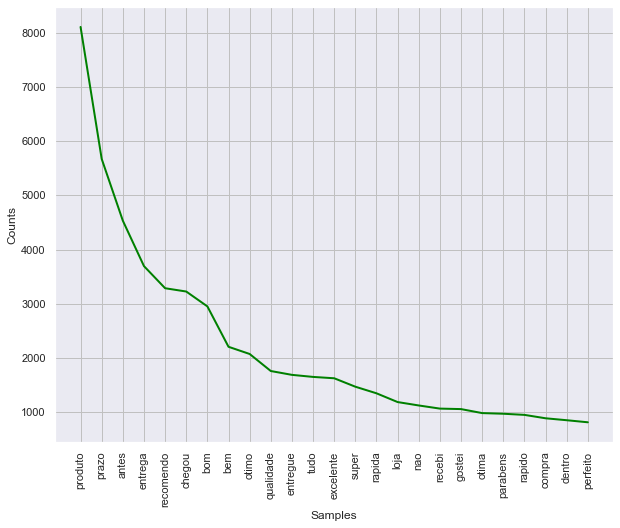

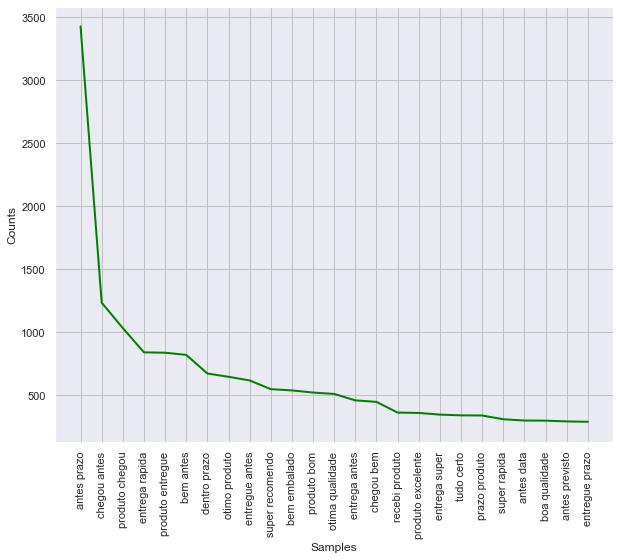

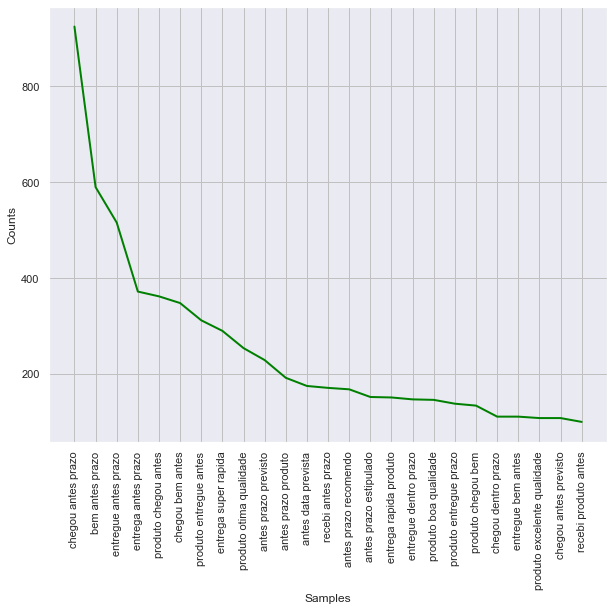

In [102]:
plt.figure(figsize=(10, 8)) 
plot_freq(unigrams_5s, "Green")
plt.figure(figsize=(10, 8)) 
plot_freq(bigrams_5s, "Green")
plt.figure(figsize=(10, 8)) 
plot_freq(trigrams_5s, "Green")

__Below are the frequency distributions for 1 star n-grams. We can identify some key topics Olist's customers dislike about their experience:__

- They didn't receive their goods yet ('recebi produto', 'ainda nao recebi', 'produto nao entregue', 'produto nao chegou', 'nao recebi mercadoria')
- They had some problem related with their invoices ('nota fiscal') *
- They want refund ('quero dinheiro volta')
- Bad quality goods ('produto pessima qualidade', 'produto veio defeito')
- They had some problem when purchasing 2 products ('comprei dois produtos')
- Bad experience with the Lannister's shop ('lannister') *
- Bad experience with customer service, probably ('contato') *


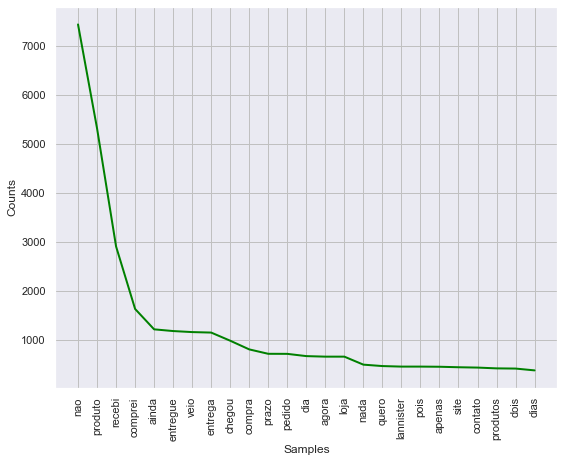

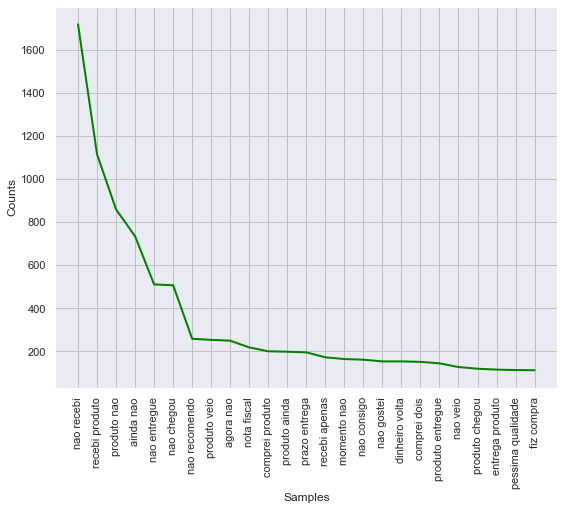

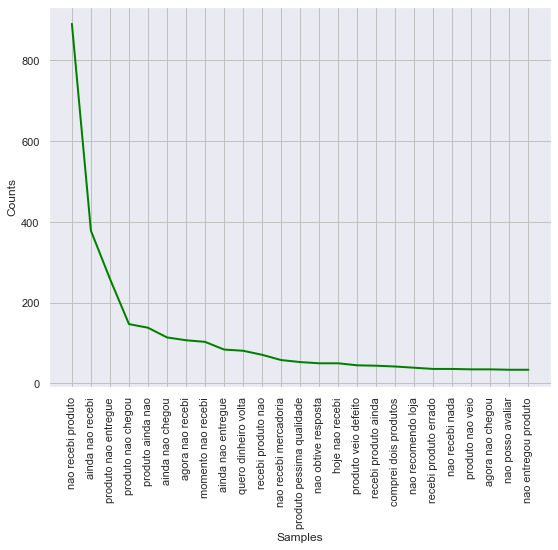

In [103]:
plt.figure(figsize=(9, 7)) 
figure=plot_freq(unigrams_1s, "Green")
plt.figure(figsize=(9, 7)) 
plot_freq(bigrams_1s, "Green")
plt.figure(figsize=(9, 7)) 
plot_freq(trigrams_1s, "Green")

__Since most 1 star reviews complain about the order not being delivered, we can select reviews that were created after the product was delivered. However, even when we do this, there are still some comments regarding delivery. We can observe n-grams similar to those above__

- They received the wrong goods ('recebi produto errado', 'produto veio errado', 'produto totalmente diferente')
- Fake goods ('produto nao original')

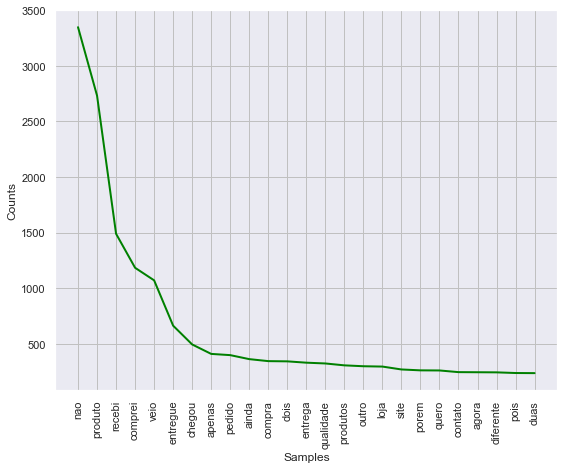

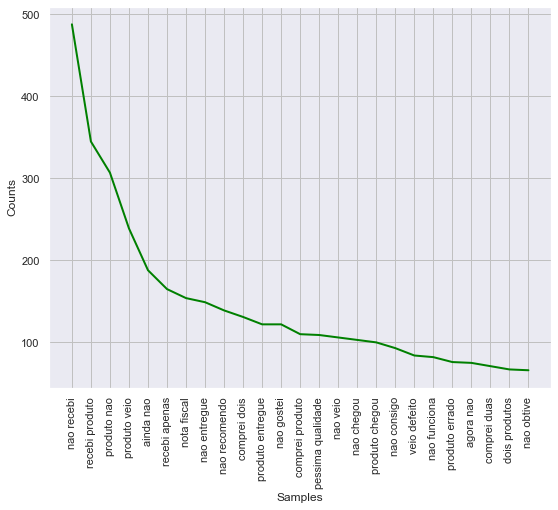

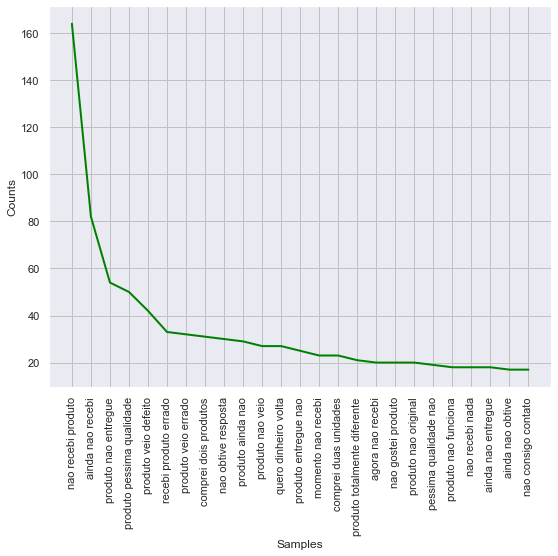

In [106]:
reviews_delivered_1s =commented_reviews[(commented_reviews["review_score"]==1)&(commented_reviews["order_delivered_customer_date"] < commented_reviews['review_creation_date'])]
unigrams_d1s, bigrams_d1s, trigrams_d1s = words_to_ngrams(reviews_delivered_1s['review_comment_words'])

plt.figure(figsize=(9, 7))
plot_freq(unigrams_d1s, "Green")
plt.figure(figsize=(9, 7))
plot_freq(bigrams_d1s, "Green")
plt.figure(figsize=(9, 7))
plot_freq(trigrams_d1s, "Green")



In [111]:
def search_words(df, words, n_samples=5, context_character_count=30):
    print(f'Search for "{words.upper()}"')
    words_set = set(words.split(' '))
    
    # Initial filter
    df = commented_reviews[commented_reviews['review_comment_words'].map(set) & words_set]
    
    if not len(df):
        print('> Number of reviews: 0\n')
        return

    # Filter by ordered words
    ordered_words_filter = lambda row, words: words in ' '.join(row['review_comment_words'])
    df = df[df.apply(ordered_words_filter, axis=1, args=(words,))]
    
    if len(df):
        print('> Number of reviews:', len(df))
    else:
        print('> Number of reviews: 0\n')
        return
    
    avg_rating = df['review_score'].mean()
    print(f'> Average rating: {avg_rating:.1f}★')
    
    if n_samples:
        print('> Samples:')
        first_word = words.split(' ')[0]
        for _, row in df.head(n_samples).iterrows():
            comment = row['review_comment_message'].replace('\r', '').replace('\n', '')
            score = row['review_score']
            normalized_comment = remove_accents(comment.lower())
            first_word_index = normalized_comment.index(first_word)

            i1 = first_word_index - context_character_count
            i2 = first_word_index + len(words) + context_character_count
            e1, e2 = '… ', ' …'

            if i1 < 0:
                i1 = 0
                e1 = ''

            if i2 > len(comment):
                i2 = len(comment)
                e2 = ''

            print(f'  {score}★', e1 + comment[i1:i2] + e2)
    print()

- Some people didn't receive their invoices
- Customers have mixed reviews about the Lannister's shop
- People rate seller's customer service badly, which seems to be unresponsive in some cases
- Some customers received fake items

In [112]:
search_words(commented_reviews, 'nota fiscal')
search_words(commented_reviews, 'lannister')
search_words(commented_reviews, 'contato')
search_words(commented_reviews, 'original')

Search for "NOTA FISCAL"


ValueError: operands could not be broadcast together with shapes (41753,) (2,) 

In [113]:
GOT_HOUSES = [
    'baratheon',
    'lannister',
    'stark',
    'targaryen',
]

for house in GOT_HOUSES:
    search_words(commented_reviews, house)

Search for "BARATHEON"
> Number of reviews: 288
> Average rating: 3.6★
> Samples:
  5★ … que isso me faria desistir do baratheon.
  1★ … ndimento e NUNCA mais compro. baratheon quando vendia por eles mesmos …
  5★ Tudo ok,o baratheon sempre responsável com a suas …
  5★ … os, já faz anos que compro no baratheon !!
  5★ Eu compro sempre no baratheon e adoro tudo.

Search for "LANNISTER"
> Number of reviews: 1117
> Average rating: 3.1★
> Samples:
  5★ Parabéns lojas lannister adorei comprar pela Internet  …
  3★ … do solução por parte de Lojas lannister.
  3★ … ês após a compra. No site das lannister costumam chegar antes do praz …
  3★ … E. Quando tentei reclamar nas lannister o sistema estaav fora do ar.  …
  1★ … tes da entrega, liguei para a lannister e os atendentes não sabiam o  …

Search for "STARK"
> Number of reviews: 321
> Average rating: 2.9★
> Samples:
  1★ … redito ser o prazo máximo. No stark o prazo máximo já se esgotou  …
  5★ sempre comprei no stark e estou satisfeito.
 

__Wrapping up__
- The analysis of customer reviews can bring valuable insights regarding ways of improving their experience, even with just basic NLP. We've seen that Olist's customers love the fast shipping their partners provide, but there's still room for improvement. Another action that may help is to identify sellers that sell poor quality/fake items, sellers that delay too much or do not emit invoices, or sellers that provide poor customer service.



In [134]:
def rgb_float_to_int(rgb):
    return tuple(int(255 * c) for c in rgb)

WORDCLOUD_1S_PALETTE = [rgb_float_to_int(rgb) for rgb in sns.color_palette('Reds', n_colors=9)[2:]]
WORDCLOUD_5S_PALETTE = [rgb_float_to_int(rgb) for rgb in sns.color_palette('Blues', n_colors=9)[2:]]

def get_1s_color(*args, **kwargs):
    return random.choice(WORDCLOUD_1S_PALETTE)

def get_5s_color(*args, **kwargs):
    return random.choice(WORDCLOUD_5S_PALETTE)

def plot_wordcloud(words, style):
    if style == '1s':
        color_function = get_1s_color
        mask_fn = 'thumbs_down.png'
        
    elif style == '5s':
        color_function = get_5s_color
        mask_fn = 'thumbs_up.png'
        
    mask = np.array(Image.open(r'C:\Users\AMI\Desktop\Buttons\th.png'))
    mask_icon = mask == 0
    mask_bg = mask > 0
    mask[mask_icon] = 255
    mask[mask_bg] = 0
        
    wordcloud = WordCloud(background_color='black', mask=mask)
    wordcloud.generate(' '.join(words))
    wordcloud.recolor(color_func=color_function)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.gcf().set_size_inches(16, 10)


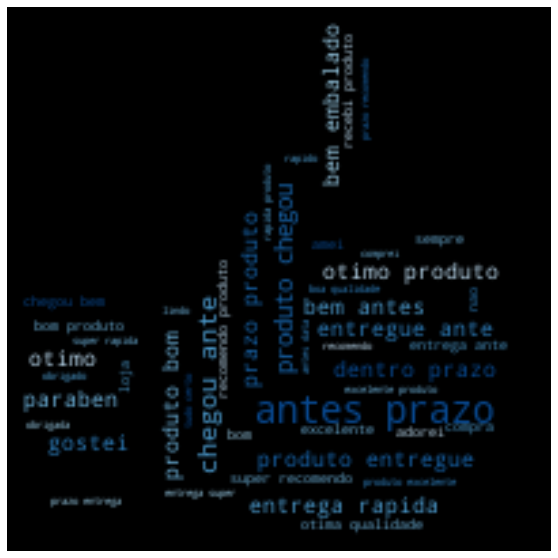

In [135]:
plot_wordcloud(unigrams_5s, '5s')

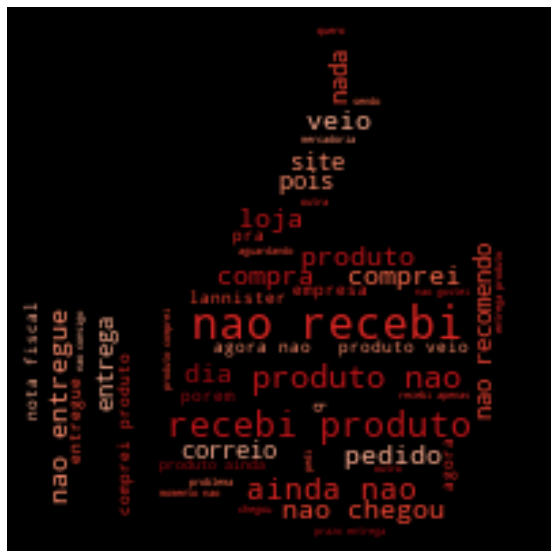

In [136]:
plot_wordcloud(unigrams_1s, '1s')

__Let's do further analysis__

- How e_commerce has evolved over time in Brazil? 

In [23]:
import calendar
from pandas.api.types import CategoricalDtype

(array([0, 1, 2]),
 [Text(0, 0, '2016'), Text(1, 0, '2017'), Text(2, 0, '2018')])

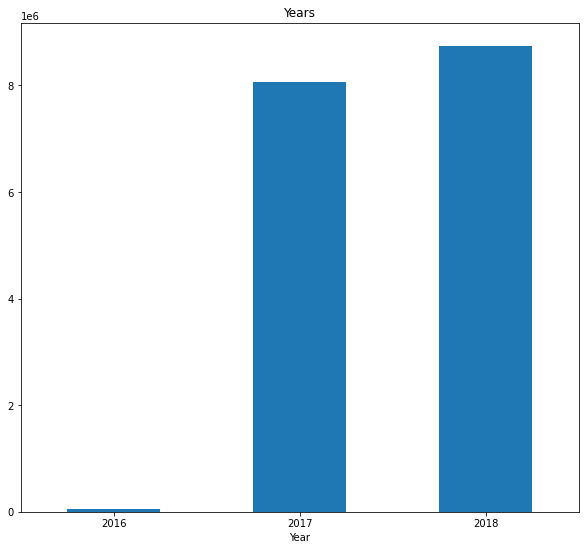

In [24]:

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y/%m/%d %H:%M:%S')
df['Year'] = df['order_purchase_timestamp'].dt.year
df.groupby("Year").size().plot(kind="bar",figsize=(10,9))
plt.title("Years")
plt.xlabel("Year")
plt.xticks(rotation=0)

- there is a huge jump from 2016 to 2017. However growing from 2017 to 2018 is quite steady.


In [ ]:
df["month"]=df["order_purchase_timestamp"].dt.month_name()
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="month",hue="Year",order=list(calendar.month_name))
plt.title('Order purchased over months in each year', fontsize=20);
plt.xlabel('Months',fontsize=15)


- we figured it out. As expected November contains the highest record for 2017, the only year containing november.
- All records of the eight Months records available for 2018 are all higher than 2017 Months records, except for November 2017. It is still the highest.

Text(0.5, 0, 'Day')

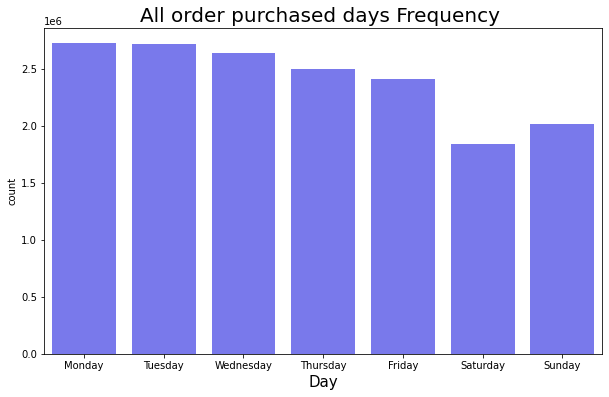

In [20]:
df["day"]=df["order_purchase_timestamp"].dt.day_name()

plt.figure(figsize=(10,6))
sns.countplot(data=df,x="day",order=list(calendar.day_name),color="Blue",alpha=0.6)

plt.title("All order purchased days Frequency ",fontsize=20)
plt.xlabel('Day',fontsize=15)

- We can see more online shopping happen on weekdays and less on weekends.

### Top 10 products

In [21]:
category=df["product_category_name_english"].value_counts().head(10)

In [22]:
category

bed_bath_table           2528111
health_beauty            1434167
sports_leisure           1215905
furniture_decor          1173576
computers_accessories    1113682
housewares               1112224
garden_tools              890849
watches_gifts             794265
toys                      659847
auto                      505733
Name: product_category_name_english, dtype: int64

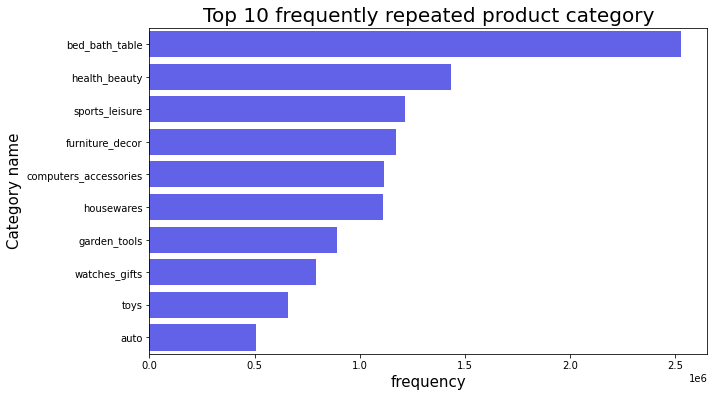

In [23]:
fig=plt.figure(figsize=(10,6))
sns.barplot(y=category.index,x=category.values,color="Blue",alpha=0.7)
plt.title('Top 10 frequently repeated product category',fontsize=20);
plt.xlabel('frequency',fontsize=15);
plt.ylabel('Category name',fontsize=15);


- Average price on each category

In [24]:
average_price=df.groupby("product_category_name_english")["price"].agg(np.mean)

In [25]:
avg_pri=average_price.sort_values().tail(10)
print('Top 10 categories with highest average price.')
print('-----------------------------------------------')
print(avg_pri.sort_values(ascending=False))

Top 10 categories with highest average price.
-----------------------------------------------
product_category_name_english
computers                                  1318.797997
small_appliances_home_oven_and_coffee       628.114359
home_appliances_2                           583.347677
agro_industry_and_commerce                  364.453829
small_appliances                            353.756378
musical_instruments                         282.155460
construction_tools_safety                   255.117532
fixed_telephony                             247.447261
watches_gifts                               207.961927
kitchen_dining_laundry_garden_furniture     197.640974
Name: price, dtype: float64


Text(0, 0.5, 'Category name')

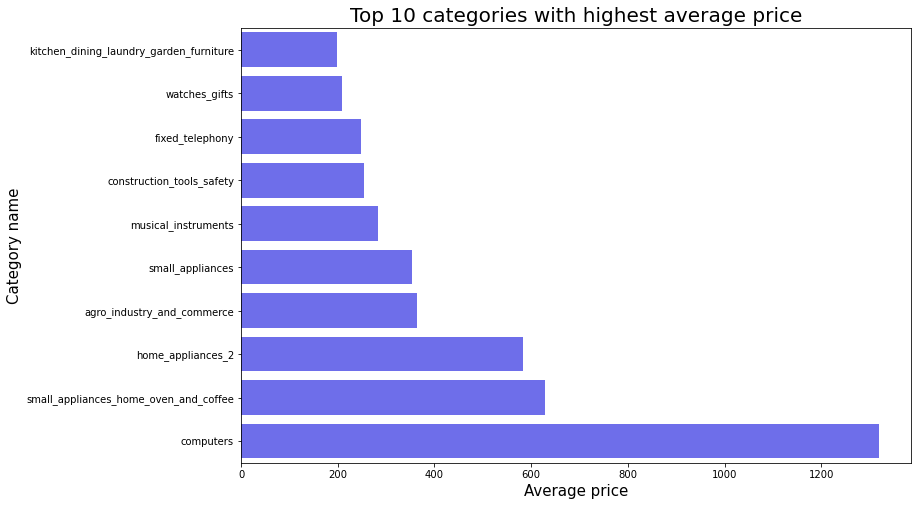

In [26]:
fig=plt.figure(figsize=(12,8))

sns.barplot(y=avg_pri.index, x=avg_pri.values,color="Blue",alpha=0.65)
plt.title('Top 10 categories with highest average price',fontsize=20)
plt.xlabel('Average price',fontsize=15)
plt.ylabel('Category name',fontsize=15)

In [27]:
top_category = df[df['product_category_name_english'].isin(category.index)]
price_top_category=round(top_category.groupby("product_category_name_english")["price"].agg(np.mean).sort_values(ascending=False), 2)


print('Avergae prices of Top 10 frequently repeated categories')
print('--------------------------------------------------------')
print(price_top_category.sort_values(ascending=False))


MemoryError: Unable to allocate 3.39 GiB for an array with shape (27, 16849468) and data type object

In [28]:
top_category = df[df['product_category_name_english'].isin(category.index)]
fig=plt.figure(figsize=(15,10))

sns.boxplot(data=top_category,x='price',y='product_category_name_english',
           showfliers=False,color="Blue");
plt.xlim(0,500);
plt.title('price distribution of the top 10 frequent Product category',fontsize=20)


plt.ylabel('Product category',fontsize=15)
plt.xlabel('Price',fontsize=15);
plt.yticks(fontsize=15);

MemoryError: Unable to allocate 1.51 GiB for an array with shape (12, 16849468) and data type float64